# Fundamentals of Machine Learning - Exercise 4
* Goal of the excercise is to learn how to use **K-means** implementation in the Scikit-learn library to perform clustering and subsequent cluster analysis on a Titanic dataset.

## 🔎 Let's discuss the clustering topic a bit first
* What task do clustering algorithms solve?
* Do you know any examples of such algorithms?
* What are the limitation of clustering algorithms?

## 🔎 What is the **hardest part** of the clustering tasks?

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_04_meme_01.jpg?raw=true)

## 💡 But don't worry we will deal with the topic in several lectures 😊

In [32]:
!pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## Import the libraries
*🔎  What is the **sklearn** library?

In [4]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# We will work with the famous Titanic dataset ⛵

## Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

* Dataset is available at https://www.kaggle.com/competitions/titanic

## Load dataset
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/titanic.csv

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/titanic.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## How many missing values do we have in the data?

In [6]:
df.isna().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

## We are going to cluster the passangers into defined number of groups
* It is clear that it is mandatory to select only a relevant subset of features
    * Name the new DF as *df_clustering*
* 🔎 Is *Name* or *Ticket* relevant?
    * 'Survived', 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'

1. Select the features
2. Drop *NaN* values
3. Change type of *Sex* and *Embarked* to string
    * **astype()** function

In [7]:
df_clustering = df[
['Survived', 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
].copy()

In [8]:
df_clustering = df_clustering.dropna()

In [9]:
df_clustering["Sex"] = df_clustering.Sex.astype(str)
df_clustering["Embarked"] = df_clustering.Embarked.astype(str)

In [10]:
df_clustering

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,29.1250,Q
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S


## Check *shape* and *dtypes*

In [11]:
df_clustering.shape

(712, 8)

In [12]:
df_clustering.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

# Print the dataset

## 🔎 Does everything seem OK?

# We can see that not all features are numerical
* 🔎 Is it a problem?
    * Why?
* 🔎 How to deal with it?

## We have two basic encoding options
* Ordinal encoding vs. One-hot encoding
* What is the difference?
    * Is thete difference in dimensionality change? Why it can be an issue?
    * When is ordinal encoding appropriate?
    * Can you omit the pre-requirements of ordinal encoding sometimes?

## Lets encode categorical features
* https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
* https://scikit-learn.org/stable/modules/classes.html?highlight=preprocessing#module-sklearn.preprocessing



In [13]:
enc = sklearn.preprocessing.OneHotEncoder()

In [14]:
enc.fit(df_clustering[["Embarked"]])

OneHotEncoder()

In [15]:
enc.fit_transform(df_clustering[["Embarked"]])

<712x3 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

In [16]:
enc.fit_transform(df_clustering[["Embarked"]])[:20]

<20x3 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

## 💡 You may ask why do we use the `dataframe[['feature_name']]` notation with double `[[` and `]]` brackets
* **Single brackets** pair around one variable name means that you want to select just the `pandas.Series` object

In [17]:
df_clustering['Sex']

PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
886    female
887      male
888    female
890      male
891      male
Name: Sex, Length: 712, dtype: object

* **Double brackets** pair around one variable name created an output in the `pandas.DataFrame` format

In [18]:
df_clustering[['Sex']]

,Sex
PassengerId,
1,male
2,female
3,female
4,female
5,male
...,...
886,female
887,male
888,female


## There is OneHotEncoder as well, however I recommend using `pd.get_dummies` method instead

In [ ]:
pd.get_dummies(df_clustering[["Embarked"]])

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
886,0,1,0
887,0,0,1
888,0,0,1


## Let's finish the encoding part and create a new dataframe with encoded data
1. Create empty *df_encoded* dataframe with index using *df_clustering.index*
2. Create *Sex* variable with ordinal encoded data
3. Use `join` method for added one-hot encoded *Embarked* feature

In [27]:
df_encoded = pd.DataFrame(index=df_clustering.index)

In [28]:
df_encoded["Sex"] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df_clustering[["Sex"]])

In [29]:
df_encoded = df_encoded.join(pd.get_dummies(df_clustering[["Embarked"]]))

In [30]:
df_encoded

,Sex,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,1.0,0,0,1
2,0.0,1,0,0
3,0.0,0,0,1
4,0.0,0,0,1
5,1.0,0,0,1
...,...,...,...,...
886,0.0,0,1,0
887,1.0,0,0,1
888,0.0,0,0,1


# It is important to select the appropriate scaling method of the number features
* There are many ways how to do this - **MinMax, StandardScaler, PowerTransform, ...**
* This step heavily depends on a domain knowledge because the scales of the features have significant effect on a distances between couples of dataset instances
    - It is clear that if one variable is in range **(0,1)** and the second one is in a range **(5000, 10 000)**, the difference in the **second feature** will be definitely **more important** than in the  first one from the numerical point of view
    - Although it is possible that from the **domain point of view** the **first variable may be more important**
    - 💡 Thus it is a good idea to at least transform the features into a **simiiar scales so the effect on the distance value would be similiar**
    - Transformation depends heavily on the statistical distribution of the feature
        - 💡You can use PowerTransform for a heavy-tailed distribution, **Standardization or MinMax normalization for normally distributed features** etc.

## Take a look at the *Fare* feature distribution
* What transformation would be appropriate based on that?

In [33]:
sns.displot(df_encoded.Fare, bins=20)

AttributeError: ignored

## Transform the feature

In [25]:
df_encoded["Fare"] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[["Fare"]])

NameError: ignored

## Add the transformed feature into the *df_encoded* dataframe

## Plot histogram of the transformer feature
* 🔎 What has changed?

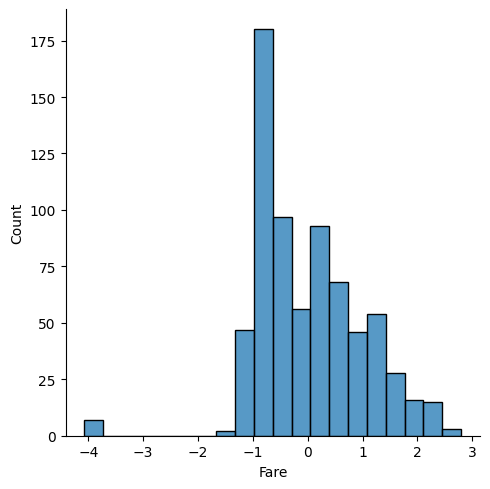

In [ ]:
sns.displot(df_encoded.Fare, bins=20)

## Scale the *Age* using MinMax scaler
* `sklearn.preprocessing.minmax_scale`

In [ ]:
df_encoded["Age"] = sklearn.preprocessing.minmax_scale(df_clustering[["Age"]])

In [ ]:
df_encoded

,Sex,Embarked_C,Embarked_Q,Embarked_S,Fare,Age
PassengerId,,,,,,
1,1.0,0,0,1,-0.997650,0.271174
2,0.0,1,0,0,1.287757,0.472229
3,0.0,0,0,1,-0.901073,0.321438
4,0.0,0,0,1,1.024276,0.434531
5,1.0,0,0,1,-0.884112,0.434531
...,...,...,...,...,...,...
886,0.0,0,1,0,0.455301,0.484795
887,1.0,0,0,1,-0.369789,0.334004
888,0.0,0,0,1,0.484313,0.233476


## Join the *df_encoded* and *['Survived', 'Pclass', 'SibSp', 'Parch']* features

In [24]:
df_encoded = df_encoded.join(df_clustering[['Survived', 'Pclass', 'SibSp', 'Parch']])

NameError: ignored

# We finally got to the clustering part 😮‍💨

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_04_meme_02.jpg?raw=true)

## There are methods how to identify probable number of clusters in the data
* It is always a rough estimate

## 💡 We can use **Elbow method** to identify potentially ideal number of clusters in our data in **KMeans** algorithm.

There are two basic methods for evaluation of clusters quality:
1. SSE - Sum of squared distances of samples to their closest cluster center, this one is specific for **KMeans** algorithm.
    * You can find it as **inertia_** attribute of KMeans sklearn object.
2. Silhouette Coefficient - calculated using the mean intra-cluster distance and the mean nearest-cluster distance

## 💡 We ussually want to find number of clusters with low SSE and high Silhoutte coef.
- Take a look at [this](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c) and [this](https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a) for more details

## Try different number of clusters from range <2, 10> for KMeans algorithm, save both evaluation criteria and plot dependency of criteria to number of clusters.
* We will use `sklearn.cluster.KMeans` class
* The most important parameter is the *n_clusters*
    * What is the *random_state* parameter?

In [23]:
X = df_encoded.values

NameError: ignored

In [ ]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [22]:
df_clustering_scores

NameError: ignored

## Plot the SSE and Silhouette score

In [21]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

NameError: ignored

In [20]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

NameError: ignored

In [ ]:
clustering = sklearn.cluster.KMeans(n_clusters=4, random_state=13).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 🔎 What is the probable number of clusters in the data?

## Let's try to analyze the data assigned into **4** clusters

In [ ]:
clustering.labels_

array([1, 3, 1, 3, 1, 3, 0, 2, 3, 2, 3, 1, 2, 1, 1, 0, 1, 1, 1, 1, 3, 0,
       2, 0, 3, 1, 3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 3, 3, 3, 1, 1, 2,
       0, 1, 3, 0, 1, 1, 0, 1, 1, 0, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1, 0, 2,
       0, 1, 1, 1, 3, 2, 1, 3, 3, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 3, 0, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1,
       3, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 0,
       2, 2, 1, 3, 0, 1, 1, 3, 1, 3, 1, 1, 0, 2, 2, 3, 1, 1, 1, 1, 1, 2,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1,
       2, 3, 1, 1, 3, 1, 2, 2, 3, 3, 2, 0, 3, 1, 1, 0, 1, 3, 3, 1, 2, 3,
       3, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 3, 1,
       2, 3, 3, 3, 3, 2, 2, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 2,
       3, 3, 3, 1, 3, 3, 1, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 2, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 0, 1, 3,

## How big are our clusters? How many 0, 1, .. are in *labels_* property?

In [ ]:
import collections
collections.Counter(clustering.labels_)

Counter({1: 398, 3: 182, 0: 35, 2: 97})

# 📒 Explore clusters
* Try to use cluster information for exploration analysis of our data
    * Create new feature *cluster_id* with the *labels_* property data

In [ ]:
df_clustering["cluster_id"] = clustering.labels_

## 🚀 Hint: You can use *sns.countplot* as a visual *.value_counts()* method

<Axes: xlabel='cluster_id', ylabel='count'>

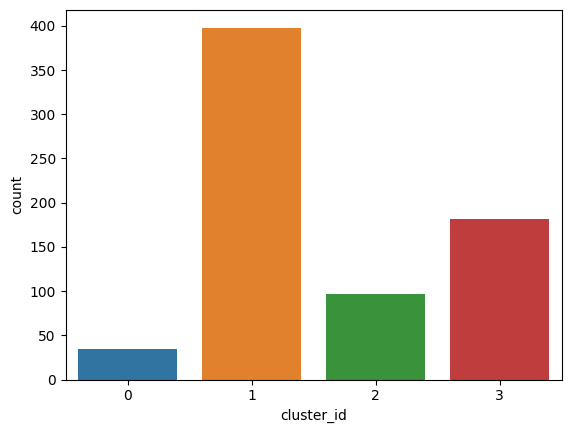

In [ ]:
sns.countplot(data=df_clustering, x='cluster_id')

## 🎯 Create plots showing values of different attributes based on cluster group and describe them
* Let's follow the four example questions about the data to solve the task

### ❓ Questions ❓
1. Is **Fare** different for points in different clusters?
    * 💡 Use *plt.yscale('log')* to take care of the outlier/variance effect
2. Is **Age** different for point in different clusters?
3. Does rate of suvival differ in clusters?
    * *Survived*
4. Does number of passanger of each class differ in clusters?
    * *Pclass*

<Axes: xlabel='cluster_id', ylabel='Fare'>

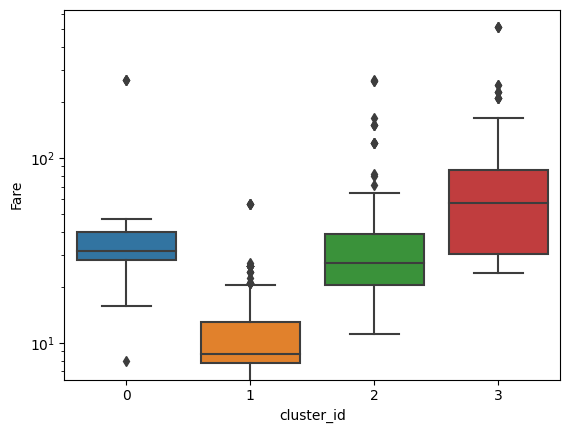

In [ ]:
plt.yscale('log')
sns.boxplot(df_clustering, x="cluster_id", y="Fare") #tyto některé funkce jsou dostupné pouze v novějších verzích seabornu

<Axes: xlabel='cluster_id', ylabel='Age'>

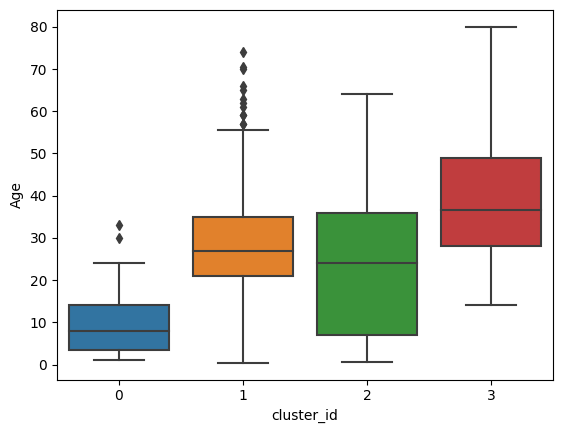

In [ ]:
sns.boxplot(df_clustering, x="cluster_id", y="Age")

<Axes: xlabel='cluster_id', ylabel='count'>

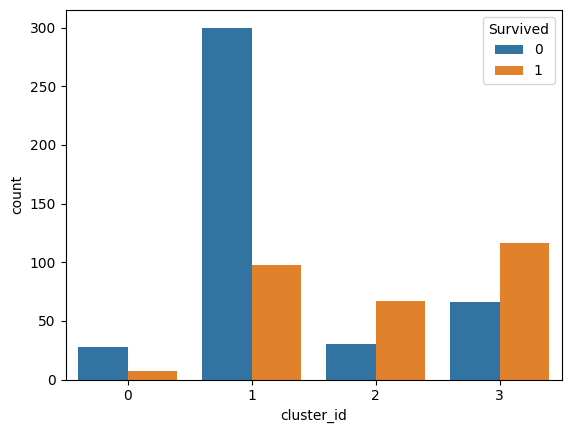

In [ ]:
sns.countplot(df_clustering, x="cluster_id", hue="Survived")

<Axes: xlabel='cluster_id', ylabel='count'>

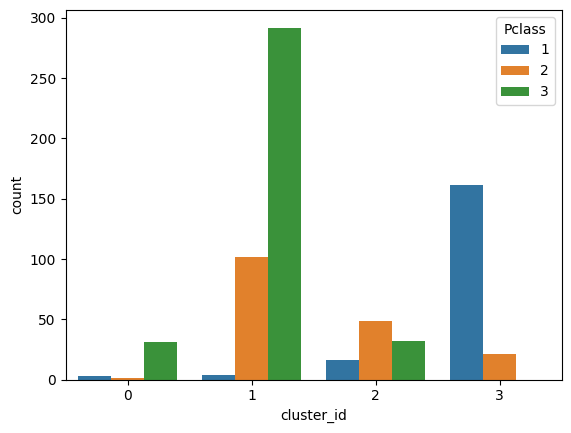

In [ ]:
sns.countplot(df_clustering, x="cluster_id", hue="Pclass", palette=sns.color_palette())

# 📝 Write a textual description of the four clusters

### Cluster 1 - ...
### Cluster 2 - ...
### Cluster 3 - ...
### Cluster 4 - ...

# Is our data represented in the best way?

* **Clustering methods depends on calculation of distance metric among data points in our data matrix.**
* Therefore it is necessary to preproces our data matrix **X** in a best way possible to achive equal distance for every dataset feature.
    * After such transformation we can presume, that difference in *Age* has same impact as the difference as in the *Fare* feature.
* **Generally, it is very hard to create perfect tranformation for our real dataset.**

## Use StandardScaler transformation for our data **X**

In [36]:
col_names = ['Fare', 'Age', 'SibSp', 'Parch']
enc = sklearn.preprocessing.StandardScaler()
X_stand = pd.DataFrame(enc.fit_transform(df_clustering.loc[:, col_names]), columns = col_names, index=df_clustering.index)
X_stand = pd.concat([X_stand, df_encoded.loc[:, ['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']], df_clustering.Survived], axis=1)

In [35]:
X_stand

,Fare,Age,SibSp,Parch
PassengerId,,,,
1,-0.516380,-0.527669,0.522511,-0.506787
2,0.694046,0.577094,0.522511,-0.506787
3,-0.503620,-0.251478,-0.552714,-0.506787
4,0.350326,0.369951,0.522511,-0.506787
5,-0.501257,0.369951,-0.552714,-0.506787
...,...,...,...,...
886,-0.102875,0.646142,-0.552714,5.350885
887,-0.407687,-0.182430,-0.552714,-0.506787
888,-0.086335,-0.734812,-0.552714,-0.506787


In [34]:
X_stand.describe()

,Fare,Age,SibSp,Parch
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,-6.736185e-17,2.943962e-16,-1.496930e-17,1.496930e-17
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-6.534272e-01,-2.017717e+00,-5.527137e-01,-5.067874e-01
25%,-5.012575e-01,-6.657639e-01,-5.527137e-01,-5.067874e-01
50%,-3.576726e-01,-1.133826e-01,-5.527137e-01,-5.067874e-01
75%,-2.962586e-02,5.770939e-01,5.225108e-01,6.647471e-01
max,9.031168e+00,3.477095e+00,4.823409e+00,6.522419e+00


# ✅ Task (2p)
1. Use **KMeans** to differently preprocessed data matrix **X_stand**
2. Detect "ideal" number of clusters using Elbow method
3. Explore detected clusters and **describe** them to the Markdown cell
    * **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
        * ❌ Plot interpretation figured in real-time during task check is not allowed! ❌

In [37]:
X_stand.dropna(inplace=True)

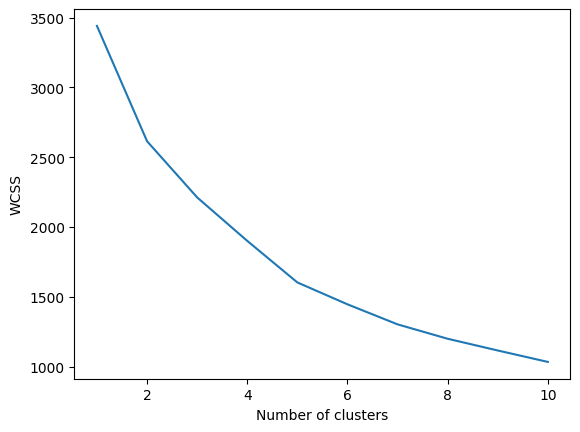

In [38]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_stand)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



Od clusteru 1 je strmý pokles WCSS až po třetí clustery. Loket je definován někde kolem 4-5 clusteru. To naznačuje, že použití 4-5 clusteru může být pro náš graf dobrou volbou, protože kdybych přidali další clustery za náš bod tak se nic moc nezmění.

Použil jsem WCSS, která vypočítává čvtercovou vzdálenost mezi každým bodem v clusteru a středem clusteru. Což znamená, že nám říká, jak těsně jsou datové body v jednotlivých clusterech seskupeny.Čím nižší je hodnota, tím těsněji spolu souvisejí.


In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_stand)

df_clustering["cluster_id"] = kmeans.labels_




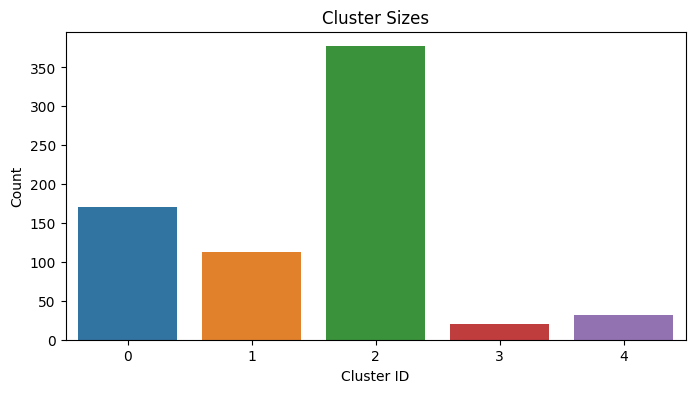

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='cluster_id', data=df_clustering)
plt.title('Cluster Sizes')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.show()


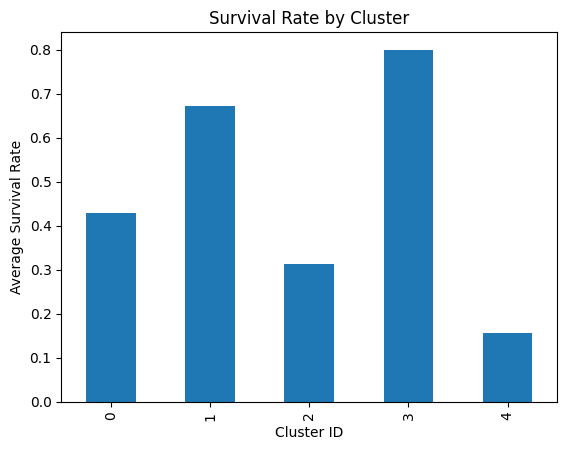

In [ ]:
survival_rate = df_clustering.groupby('cluster_id')['Survived'].mean()
survival_rate.plot(kind='bar')
plt.title('Survival Rate by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Average Survival Rate')
plt.show()


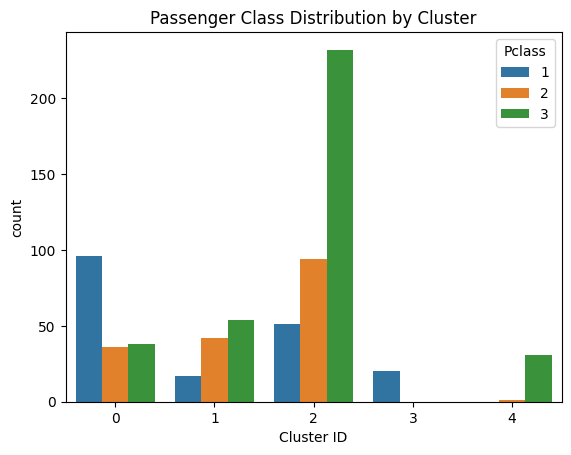

In [ ]:
sns.countplot(x='cluster_id', hue='Pclass', data=df_clustering)
plt.title('Passenger Class Distribution by Cluster')
plt.xlabel('Cluster ID')
plt.show()


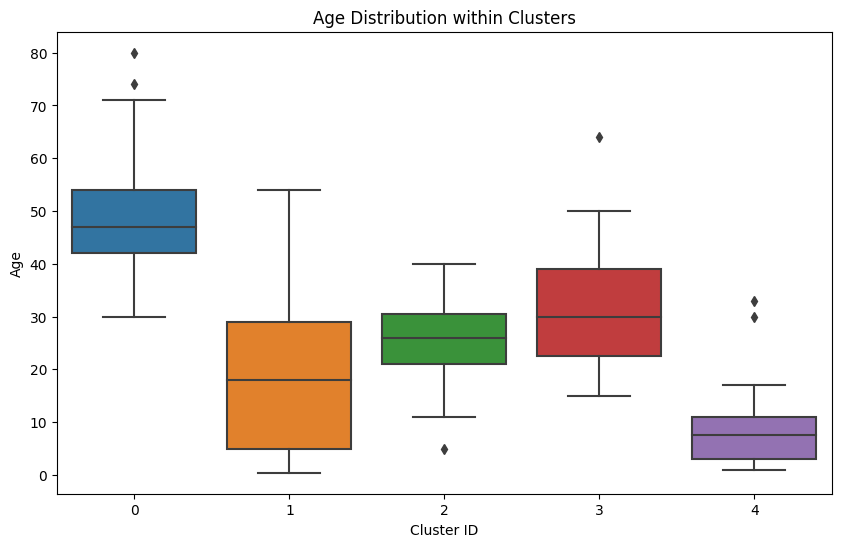

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_id', y='Age', data=df_clustering)
plt.title('Age Distribution within Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('Age')
plt.show()


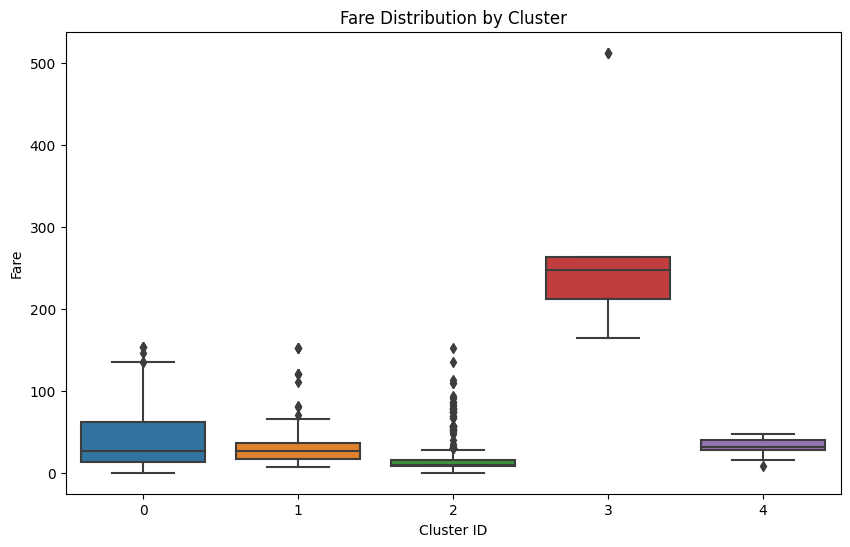

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_id', y='Fare', data=df_clustering)
plt.title('Fare Distribution by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Fare')
plt.show()


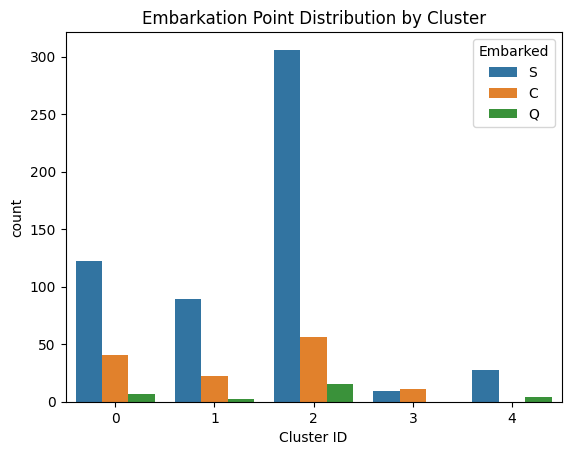

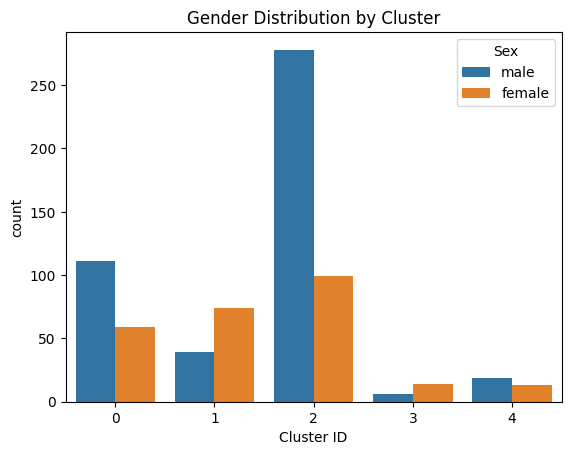

In [ ]:
sns.countplot(x='cluster_id', hue='Embarked', data=df_clustering)
plt.title('Embarkation Point Distribution by Cluster')
plt.xlabel('Cluster ID')
plt.show()

sns.countplot(x='cluster_id', hue='Sex', data=df_clustering)
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster ID')
plt.show()


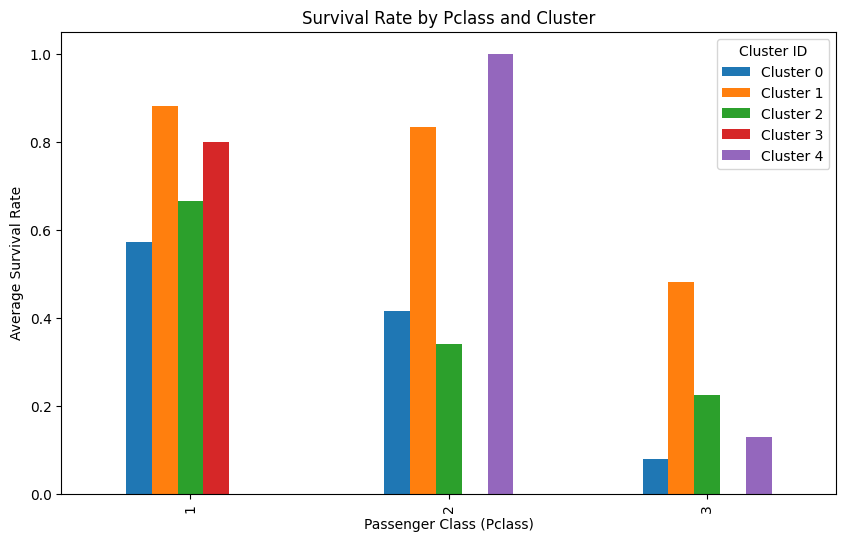

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_stand)

df_clustering["cluster_id"] = kmeans.labels_

class_survival_rate = df_clustering.groupby(['Pclass', 'cluster_id'])['Survived'].mean().unstack()

class_survival_rate.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Rate by Pclass and Cluster')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Survival Rate')
plt.legend(title='Cluster ID', labels=[f'Cluster {i}' for i in range(optimal_k)])
plt.show()
